# SENG 474 A02: Assignment 1
## Random Forests (Without Pruning)
Sean McAuliffe, V00913346  
February 3, 2023

---

# Environment Setup

In [6]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib
# !pip3 install graphviz

import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import graphviz

---

# Data Import

In [9]:
print("Importing the income dataset...")
income_dataset = np.genfromtxt('./cleaned_adult.csv', delimiter=',', skip_header=1, dtype=int)

def split_dataset(training_percent):
    """ Split the dataset into training and testing sets """
    np.random.shuffle(income_dataset)
    features = income_dataset[:, :-1]
    labels = income_dataset[:, -1]
    training_features = features[:int(training_percent * features.shape[0])]
    training_labels = labels[:int(training_percent * labels.shape[0])]
    testing_features = features[int(training_percent * features.shape[0]):]
    testing_labels = labels[int(training_percent * labels.shape[0]):]
    return training_features, training_labels, testing_features, testing_labels

# Extract the featrue names from the first row of the dataset
feature_names = np.genfromtxt('./cleaned_adult.csv',
                                delimiter=',',
                                max_rows=1,
                                dtype=str)[:-1]
label_names = ['poor', 'rich']

print("Data ready for retrieval via split_dataset function...")

Importing the income dataset...
Data ready for retrieval via split_dataset function...


---

## Random Forest Sample Code
1. Scikit ensemble methods docs: https://scikit-learn.org/stable/modules/ensemble.html
2. Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
3. Parameter Tuning: https://scikit-learn.org/stable/modules/ensemble.html#parameters

In [8]:
# Example Random Forest Classifier listing all the parameters and
# their default values

rfc = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='sqrt',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=None,
                            verbose=0,
                            warm_start=False,
                            class_weight=None,
                            ccp_alpha=0.0,
                            max_samples=None)

# Example of training a Random Forest Classifier
X_train, y_train, X_test, y_test = split_dataset(0.8)
rfc.fit(X_train, y_train)
print("Accuracy of RFC: {:.2f}".format(rfc.score(X_test, y_test)))

Accuracy of RFC: 0.85


---

Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
Tree 21
Tree 22
Tree 23
Tree 24
Tree 25
Tree 26
Tree 27
Tree 28
Tree 29
Tree 30
Tree 31
Tree 32
Tree 33
Tree 34
Tree 35
Tree 36
Tree 37
Tree 38
Tree 39
Tree 40
Tree 41
Tree 42
Tree 43
Tree 44
Tree 45
Tree 46
Tree 47
Tree 48
Tree 49
Tree 50
Tree 51
Tree 52
Tree 53
Tree 54
Tree 55
Tree 56
Tree 57
Tree 58
Tree 59
Tree 60
Tree 61
Tree 62
Tree 63
Tree 64
Tree 65
Tree 66
Tree 67
Tree 68
Tree 69
Tree 70
Tree 71
Tree 72
Tree 73
Tree 74
Tree 75
Tree 76
Tree 77
Tree 78
Tree 79
Tree 80
Tree 81
Tree 82
Tree 83
Tree 84
Tree 85
Tree 86
Tree 87
Tree 88
Tree 89
Tree 90
Tree 91
Tree 92
Tree 93
Tree 94
Tree 95
Tree 96
Tree 97
Tree 98
Tree 99
Tree 100
Tree 101
Tree 102
Tree 103
Tree 104
Tree 105
Tree 106
Tree 107
Tree 108
Tree 109
Tree 110
Tree 111
Tree 112
Tree 113
Tree 114
Tree 115
Tree 116
Tree 117
Tree 118
Tree 119
Tree 120
Tree 121
Tree 122
Tree 123
Tree 124

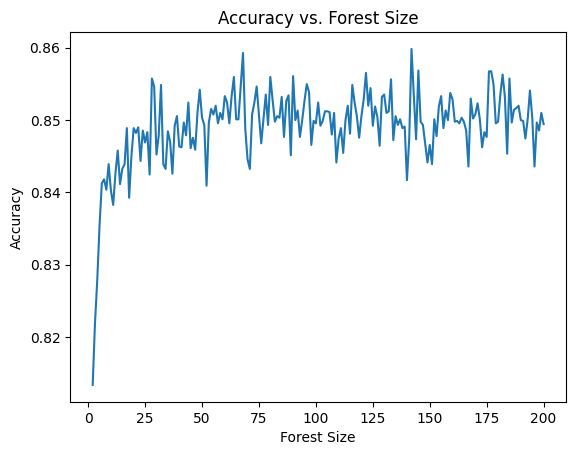

In [14]:
# Experiment 1: Varying the Forest Size

rfc_list = []
for i in range(2, 201):
    X_train, y_train, X_test, y_test = split_dataset(0.8)
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size")
plt.show()

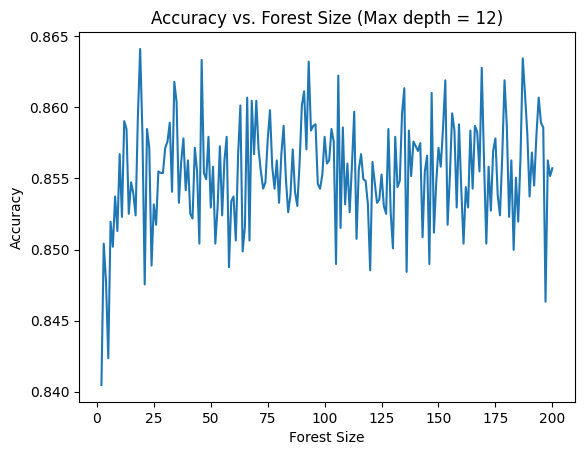

In [19]:
# Experiment 1B: Varying the Forest Size, W/ Limited Max Depth

rfc_list = []
for i in range(2, 201):
    X_train, y_train, X_test, y_test = split_dataset(0.8)
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                max_depth=12)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.show()

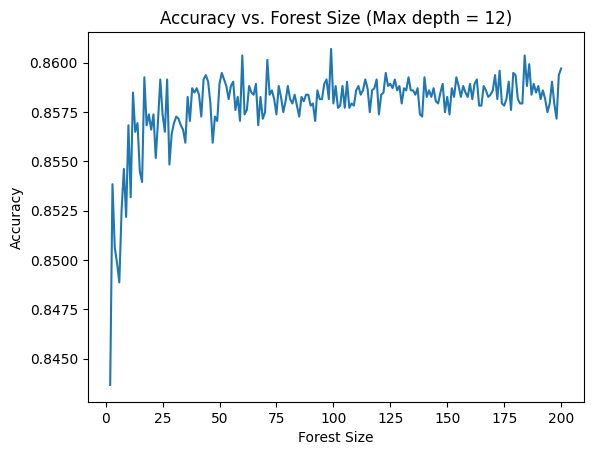

In [24]:
# Experiment 1C: Varying the Forest Size, W/ Limited Max Depth
# With a static training set

rfc_list = []
X_train, y_train, X_test, y_test = split_dataset(0.8)
for i in range(2, 201):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                max_depth=12)
    rfc.fit(X_train, y_train)
    rfc_list.append(rfc.score(X_test, y_test))

plt.plot(range(2, 201), rfc_list)
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.show()

Changing the shuffled order of the training + test examples introduces a lot of variability in the accuracy of the model trained on it -> some training examples are just 'lucky'.

Below we are trying to determine the relationship between forest size and accuracy 
by fitting a curve to the accuracy data and finding its maximum.

maximum: 199.9984637007033 0.8583552232362794


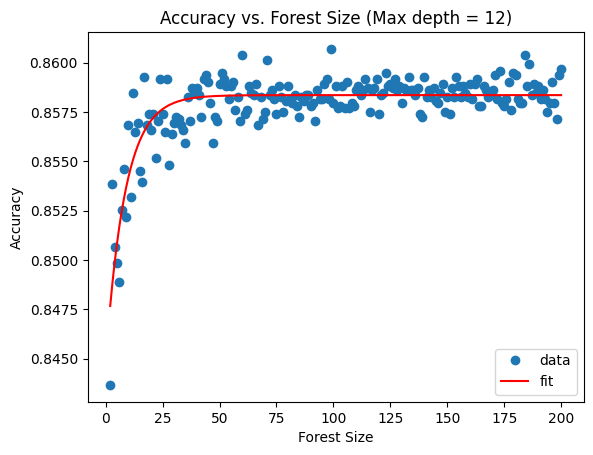

In [38]:
# Scipy curve fitting optimization
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit, minimize_scalar

def objective(x, a, b, c):
    return a * np.exp(-b * x) + c

# curve fit
popt, _ = curve_fit(objective, range(2, 201), rfc_list)

# Method for finding the maximum
# https://stackoverflow.com/questions/29954153/finding-the-maximum-of-a-curve-scipy
fm = lambda x: -objective(x, *popt)
r = minimize_scalar(fm, bounds=(0, 200))
print("maximum:", r["x"], objective(r["x"], *popt))  #maximum: 2.99846874275 18.3928199902

# plot the curve against the actual data
plt.plot(range(2, 201), rfc_list, 'o', label='data')
plt.plot(range(2, 201), objective(range(2, 201), *popt), 'r-', label='fit')
plt.xlabel("Forest Size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Forest Size (Max depth = 12)")
plt.legend()
plt.show()

The results appear to be that at least up to a forest size of 200, larger is always better. Although the benefits of larger forests diminish as the forest size increases, after about 40-50 trees the further increases are fairly small.